In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [15]:
df_apps=pd.read_csv('googleplaystore.csv')

In [16]:
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
df_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Comment
As we can see the Reviews, Price, Installs and Size are not numerical, so we should convert it. 

In [18]:
df_apps['Reviews'] = pd.to_numeric(df_apps['Reviews'], errors='coerce')

df_apps['Installs'] = df_apps['Installs'].str.replace(',', '', regex=False).str.replace('+', '', regex=False)

df_apps['Installs'] = pd.to_numeric(df_apps['Installs'], errors='coerce')

df_apps['Price'] = df_apps['Price'].str.replace('$', '', regex=False)

df_apps['Price'] = pd.to_numeric(df_apps['Price'], errors='coerce')

df_apps['Size'] = df_apps['Size'].replace('Varies with device', np.nan)

df_apps['Size'] = df_apps['Size'].str.replace('M', '', regex=False)

df_apps['Size'] = pd.to_numeric(df_apps['Size'], errors='coerce')

print(df_apps[['Reviews', 'Installs', 'Price','Size']].dtypes)
print(df_apps[['Reviews', 'Installs', 'Price','Size']].head())


Reviews     float64
Installs    float64
Price       float64
Size        float64
dtype: object
    Reviews    Installs  Price  Size
0     159.0     10000.0    0.0  19.0
1     967.0    500000.0    0.0  14.0
2   87510.0   5000000.0    0.0   8.7
3  215644.0  50000000.0    0.0  25.0
4     967.0    100000.0    0.0   2.8


Text(0.5, 1.0, 'Distribution of Apps by Category')

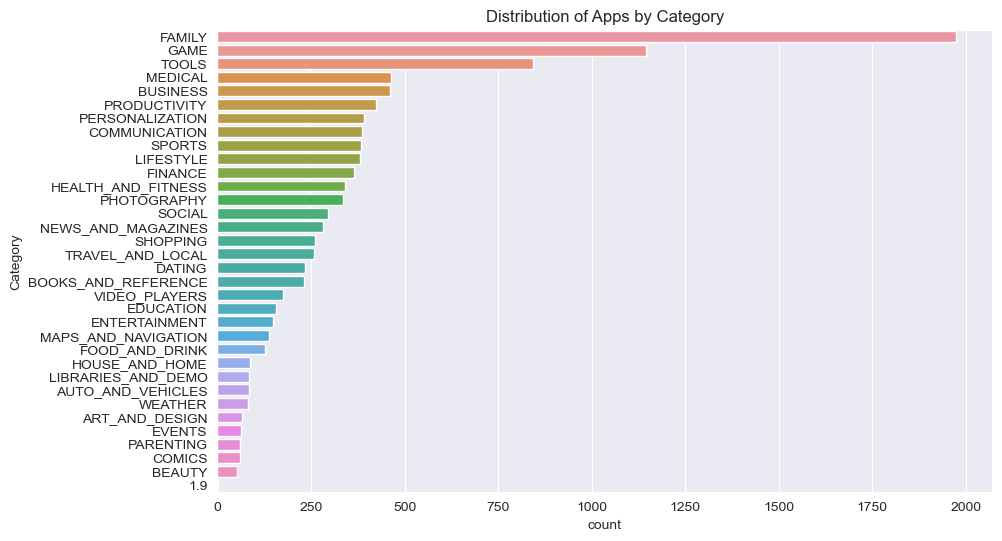

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df_apps, order=df_apps['Category'].value_counts().index)
plt.title('Distribution of Apps by Category')

## Comment
The most popular category is "Family," with nearly 2,000 applications. This is likely because parents often install apps for their children to provide entertainment while maintaining control over the content. Many apps in the "Family" category, such as "YouTube Kids," offer parental control features to ensure safe usage.

The second most popular category is "Game," with over 1,100 apps. This is unsurprising, as gaming is a favorite pastime for many people who enjoy spending their free time playing mobile games.

The third most popular category is "Tools." These apps are essential for enhancing device functionality, such as improving productivity, managing files, or optimizing system performance. Users frequently download tools to make their smartphones more efficient and versatile for everyday tasks.

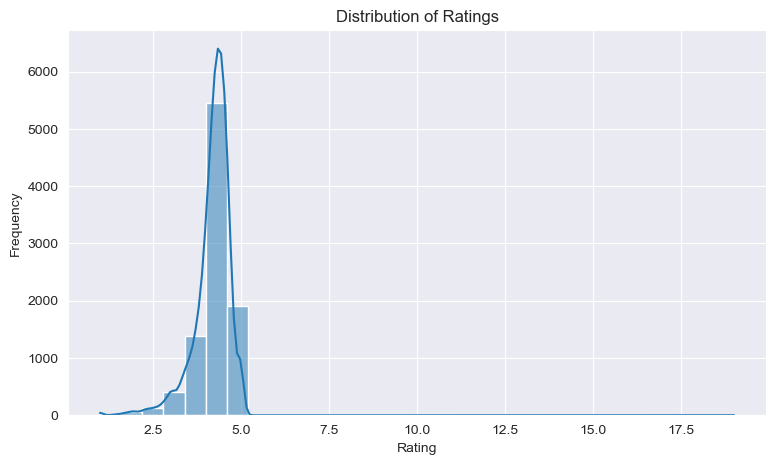

In [29]:
# Exploring the distribution of Ratings
plt.figure(figsize=(9, 5))
sns.histplot(df_apps['Rating'], bins=30, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

## Comment 
The histogram shows a right-skewed distribution, with most ratings clustering between 4.5 and 5.0. The peak frequency occurs at 5.0, indicating that users tend to rate apps positively, suggesting high satisfaction.

Very few apps receive ratings below 3.0, reflecting that most users do not rate apps poorly. This could imply that users tend to only review apps they enjoy or that they have had a positive experience with.

The high concentration of ratings at the top end of the scale could suggest that users are inclined to give favorable ratings. It could also reflect a lack of transparency regarding how ratings are aggregated or an influence of app marketing strategies that encourage positive reviews.